**PCA and Correlation Matrixes for Moral Machine Dataset**

In [64]:
%matplotlib inline
import warnings 
warnings.simplefilter(action='ignore')
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('df_moral.csv', index_col=None, low_memory=False, header = 0)
df = df.rename(columns={'Age': 'Save_young', 'Fitness': 'Save_fit', 'Gender': 'Save_male', 
                        'Social Status': 'Save_highclass', 'Species': 'Save_humans', 'Utilitarian': 'Save_more',
                    'UserCountry3': 'Country', 'Review_age': 'Age', 'Review_education': 'Education', 'Review_gender': 'Gender', 
                        'Review_income': 'Income', 'Review_political': 'Political_level', 'Review_religious': 'Religious_level'})
df = df.drop("Unnamed: 0", axis = 1)
df.head(10)

,UserID,Save_young,Save_fit,Save_male,Save_highclass,Save_humans,Save_more,Age,Education,Gender,Income,Country,Political_level,Religious_level
0,2271406345.00,0.50,0.50,0.00,nan,1.00,0.50,41.00,bachelor,male,15000.00,DEU,0.48,0.81
1,2423489328.00,0.50,1.00,0.00,nan,1.00,1.00,31.00,bachelor,female,50000.00,BRA,0.35,0.00
2,2468356544.00,0.50,0.50,1.00,nan,1.00,1.00,20.00,graduate,female,0.00,USA,0.50,0.65
3,2547770703.00,1.00,1.00,1.00,nan,1.00,1.00,21.00,college,male,0.00,USA,1.00,0.00
4,2621136109.00,0.00,1.00,0.50,nan,0.50,1.00,18.00,underHigh,male,25000.00,USA,0.50,0.50
5,2634986533.00,1.00,0.00,0.00,0.50,1.00,0.50,18.00,high,female,0.00,ESP,1.00,0.00
6,2639707939.00,1.00,0.50,1.00,nan,1.00,0.00,37.00,graduate,male,80000.00,USA,0.50,0.50
7,2641366668.00,1.00,1.00,1.00,nan,1.00,1.00,22.00,bachelor,male,10000.00,ITA,0.00,0.00
8,2693609593.00,0.50,1.00,1.00,1.00,1.00,0.00,31.00,bachelor,male,35000.00,FIN,0.50,0.50
9,2713973345.00,0.50,0.50,1.00,0.00,0.50,0.00,18.00,high,male,0.00,USA,0.23,0.65


**Null Values** 

As seen in EDA, Social Class (Save_highclass) has a high number of Nan compared to other scenarios - have run PCA removing those rows and also PCA with just the other 5 classes as PCA doesn't accept nan values.

This reduces dataset from approx 280000 to 165601.

In [3]:
df.isnull().sum()

UserID                  0
Save_young           1632
Save_fit             4614
Save_male             842
Save_highclass     106649
Save_humans           847
Save_more              27
Age                     0
Education               0
Gender                  0
Income                  0
Country                 0
Political_level         0
Religious_level         0
dtype: int64

In [4]:
#dropping nans reduces from 280000 approx to 165601 rows
df_pca = df[['UserID', 'Save_young', 'Save_fit', 'Save_male', 'Save_highclass', 'Save_humans', 'Save_more']]
df_pca = df_pca.dropna()
df_pca = df_pca.set_index('UserID')
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 159471 entries, 2634986533.0 to 9999973321959890.0
Data columns (total 6 columns):
Save_young        159471 non-null float64
Save_fit          159471 non-null float64
Save_male         159471 non-null float64
Save_highclass    159471 non-null float64
Save_humans       159471 non-null float64
Save_more         159471 non-null float64
dtypes: float64(6)
memory usage: 8.5 MB


In [5]:
df_pca.head()

,Save_young,Save_fit,Save_male,Save_highclass,Save_humans,Save_more
UserID,,,,,,
2634986533.00,1.00,0.00,0.00,0.50,1.00,0.50
2693609593.00,0.50,1.00,1.00,1.00,1.00,0.00
2713973345.00,0.50,0.50,1.00,0.00,0.50,0.00
2779335115.00,1.00,0.50,0.00,1.00,1.00,1.00
2809254049.00,1.00,0.00,1.00,0.00,1.00,1.00


**Just a quick attempt at removing any values that aren't 0 or 1 to see how much dataset changes**

In [6]:
df_binary_age = df_pca.loc[(df_pca['Save_young'] == 0) | (df_pca['Save_young']== 1)] #114000
df_binary_fit = df_binary_age.loc[(df_binary_age['Save_fit'] == 0) | (df_binary_age['Save_fit']== 1)] #73766
df_binary_male = df_binary_fit.loc[(df_binary_fit['Save_male'] == 0) | (df_binary_fit['Save_male']== 1)] #42866
df_binary_highclass = df_binary_male.loc[(df_binary_male['Save_highclass'] == 0) | (df_binary_male['Save_highclass']== 1)] #39834
df_binary_humans = df_binary_highclass.loc[(df_binary_highclass['Save_humans'] == 0) | (df_binary_highclass['Save_humans']== 1)] #34513
df_binary_more = df_binary_humans.loc[(df_binary_humans['Save_more'] == 0) | (df_binary_humans['Save_more']== 1)] #25487
len(df_binary_more)


25487

**Running PCA & transforming features**

In [7]:
#Scaling values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_pca)

pca = PCA()
X_std = sc.fit_transform(X)
X_reduced = pca.fit_transform(X_std)
X_reduced

array([[ 2.91240795e-01, -6.07551140e-01,  1.81122054e+00,
         1.55444168e-01, -4.36821933e-01,  1.28780785e+00],
       [ 1.40620995e+00,  5.54266267e-01, -2.02095709e+00,
        -1.39369404e-01, -2.17141635e+00,  8.23717942e-01],
       [ 3.34877486e+00,  2.88279163e-01, -9.80338449e-01,
        -3.03793916e-01,  2.19818632e-03,  1.37624018e+00],
       ...,
       [-6.26974484e-01,  1.43002155e-01, -8.06557289e-01,
        -4.23051682e-01, -4.83096794e-01, -1.23941260e+00],
       [-4.58674444e-01, -5.34210556e-01, -4.86010723e-01,
        -1.73515840e+00,  1.16291265e+00,  4.45798893e-01],
       [-7.42085396e-01, -1.01722631e+00, -1.29444457e+00,
         9.41079922e-01,  2.33510380e-01,  1.22854166e-01]])

**Explained Variance**

Low explained variance amongst the first 2-3 PCs.

Relations is to see the effect of each PC on a User basis.

Comp is to see the values of the PCA components.

Components is to see the effect of each Scenario in each PC, that is how much variance is explained.

In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2288045 , 0.16718067, 0.16305556, 0.1553498 , 0.14697499,
       0.13863448])

In [9]:
relations = pd.DataFrame(X_reduced, columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6'], index = np.transpose(df_pca).columns)
relations.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
UserID,,,,,,
2634986533.00,0.29,-0.61,1.81,0.16,-0.44,1.29
2693609593.00,1.41,0.55,-2.02,-0.14,-2.17,0.82
2713973345.00,3.35,0.29,-0.98,-0.30,0.00,1.38
2779335115.00,-1.42,-0.04,1.01,0.19,-0.15,-0.07
2809254049.00,0.63,-2.38,-0.30,0.19,1.48,0.75


In [10]:
comp = np.transpose(pca.components_)
comp

array([[-0.54633138,  0.00535662, -0.0045628 ,  0.14080834,  0.30692153,
         0.76644941],
       [-0.28804791,  0.5259624 , -0.51988043, -0.60086284, -0.04704313,
        -0.08286791],
       [ 0.24951174, -0.35843573, -0.84226957,  0.27494472,  0.13966887,
         0.06890357],
       [-0.42220168,  0.29050598, -0.13880781,  0.64662195, -0.50062369,
        -0.22212697],
       [-0.34642779, -0.66125599, -0.02570747, -0.35306705, -0.56141096,
         0.04721032],
       [-0.50796442, -0.27056511,  0.01889463,  0.02767629,  0.56415635,
        -0.59107639]])

In [11]:
components= pd.DataFrame(comp, columns = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6'], index = df_pca.columns)
components

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
Save_young,-0.55,0.01,-0.00,0.14,0.31,0.77
Save_fit,-0.29,0.53,-0.52,-0.60,-0.05,-0.08
Save_male,0.25,-0.36,-0.84,0.27,0.14,0.07
Save_highclass,-0.42,0.29,-0.14,0.65,-0.50,-0.22
Save_humans,-0.35,-0.66,-0.03,-0.35,-0.56,0.05
Save_more,-0.51,-0.27,0.02,0.03,0.56,-0.59


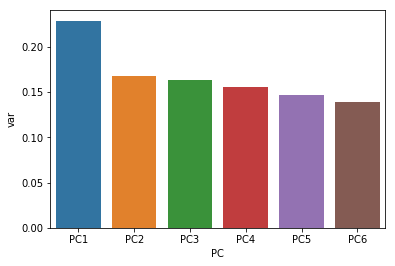

In [14]:
#Here we see the plotted variance explained by each PC
df_variance = pd.DataFrame({'var': explained_variance,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=df_variance);

**Correlation Matrix**

Plot the Scenarios in a correlation matrix to see how correlated they are.

Not very correlated which could explain the low proportion of Variance explained by the first 2-3 PCs.

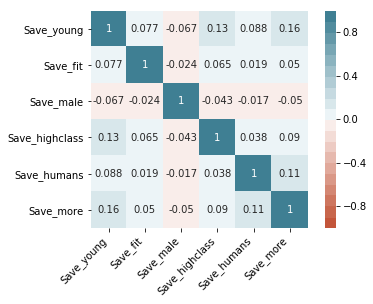

In [35]:
#Correlation matrix
corr = df_pca.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Converting demographic from categorical to numerical variables**

In [15]:
df.dtypes

UserID             float64
Save_young         float64
Save_fit           float64
Save_male          float64
Save_highclass     float64
Save_humans        float64
Save_more          float64
Age                float64
Education           object
Gender              object
Income             float64
Country             object
Political_level    float64
Religious_level    float64
dtype: object

In [16]:
#Convert categorical variables
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df1 = df.apply(lambda x: object_to_int(x))

df1.head()

,UserID,Save_young,Save_fit,Save_male,Save_highclass,Save_humans,Save_more,Age,Education,Gender,Income,Country,Political_level,Religious_level
0,2271406345.00,0.50,0.50,0.00,nan,1.00,0.50,41.00,0,1,15000.00,17,0.48,0.81
1,2423489328.00,0.50,1.00,0.00,nan,1.00,1.00,31.00,0,0,50000.00,8,0.35,0.00
2,2468356544.00,0.50,0.50,1.00,nan,1.00,1.00,20.00,2,0,0.00,72,0.50,0.65
3,2547770703.00,1.00,1.00,1.00,nan,1.00,1.00,21.00,1,1,0.00,72,1.00,0.00
4,2621136109.00,0.00,1.00,0.50,nan,0.50,1.00,18.00,4,1,25000.00,72,0.50,0.50


**Although doesn't make sense for this study - trialling combining demographic characteristics and scenario choices in PCA**

In [17]:
df1 = df1.dropna()
df1 = df1.set_index('UserID')

In [18]:
df1.head()

,Save_young,Save_fit,Save_male,Save_highclass,Save_humans,Save_more,Age,Education,Gender,Income,Country,Political_level,Religious_level
UserID,,,,,,,,,,,,,
2634986533.00,1.00,0.00,0.00,0.50,1.00,0.50,18.00,3,0,0.00,23,1.00,0.00
2693609593.00,0.50,1.00,1.00,1.00,1.00,0.00,31.00,0,1,35000.00,25,0.50,0.50
2713973345.00,0.50,0.50,1.00,0.00,0.50,0.00,18.00,3,1,0.00,72,0.23,0.65
2779335115.00,1.00,0.50,0.00,1.00,1.00,1.00,35.00,3,1,50000.00,72,1.00,0.85
2809254049.00,1.00,0.00,1.00,0.00,1.00,1.00,20.00,0,0,5000.00,61,0.72,0.01


In [19]:
df1_1 = sc.fit_transform(df1)
pca = PCA()
df1_reduced = pca.fit_transform(df1_1)
df1_reduced

array([[-1.93069697,  0.86893275, -1.3473636 , ..., -1.38040404,
        -0.32203651, -0.35702811],
       [ 1.48498358,  0.967823  ,  0.72492293, ..., -1.79194067,
         0.2942628 , -0.04561896],
       [ 0.28917657,  3.37322205,  2.32129115, ..., -0.39337268,
         0.14693461,  0.02577427],
       ...,
       [-1.1550222 , -0.39640062, -0.23883901, ...,  0.2450045 ,
        -0.24154617,  0.09044933],
       [-1.87775674,  0.0540737 , -0.77085755, ..., -0.58711293,
         1.42163285, -0.33940798],
       [-0.05243965, -0.81749389,  0.76242718, ...,  0.15845831,
         0.40059633,  0.2588295 ]])

**As expected - even lower explained variance for each PC which makes sense given the increase in features and lack of correlation between them**

In [20]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12814287, 0.10370053, 0.10090642, 0.08503683, 0.07772224,
       0.07672329, 0.07219365, 0.07016307, 0.0688582 , 0.06406692,
       0.06252687, 0.05132481, 0.0386343 ])

**Running PCA without Social Class as there are such a large number of nans**

As seen in the next cell - there are only a few nan values now compared to previously.

This provides slightly better scores of explained variance, with more explained by the first 2-3 PC's but there are only 5 PC's, therefore not a major change. 

In [21]:
#dropping social class pca
df_nosocial = df[['UserID', 'Save_young', 'Save_fit', 'Save_male', 'Save_humans', 'Save_more']]
df_nosocial.isnull().sum()#df1 = df1.dropna()
#df1 = df1.set_index('UserID')

UserID            0
Save_young     1632
Save_fit       4614
Save_male       842
Save_humans     847
Save_more        27
dtype: int64

In [22]:
#lets try using all the components
df_nosocial = df_nosocial.dropna()
df_nosocial = df_nosocial.set_index('UserID')

In [23]:
df_nosocial.head()

,Save_young,Save_fit,Save_male,Save_humans,Save_more
UserID,,,,,
2271406345.00,0.50,0.50,0.00,1.00,0.50
2423489328.00,0.50,1.00,0.00,1.00,1.00
2468356544.00,0.50,0.50,1.00,1.00,1.00
2547770703.00,1.00,1.00,1.00,1.00,1.00
2621136109.00,0.00,1.00,0.50,0.50,1.00


In [24]:
df_scaled = sc.fit_transform(df_nosocial)
pca = PCA()
dfsoc_reduced = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.25823145, 0.19845967, 0.19525422, 0.18054698, 0.16750768])

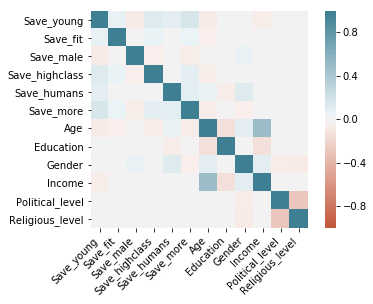

In [27]:
df_cor = df1[['Save_young', 'Save_fit', 'Save_male', 'Save_highclass', 'Save_humans', 'Save_more','Age', 'Education', 'Gender', 'Income', 'Political_level', 'Religious_level']]
corr = df_cor.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


**Correlation Matrix of Demographic Variables**

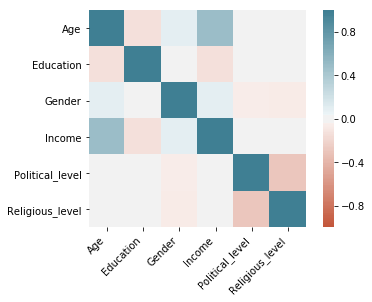

In [25]:
df_dem = df1[['Age', 'Education', 'Gender', 'Income', 'Political_level', 'Religious_level']]
corr = df_dem.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Mosaic Plot to showcase representation of population (Education, Gender)**

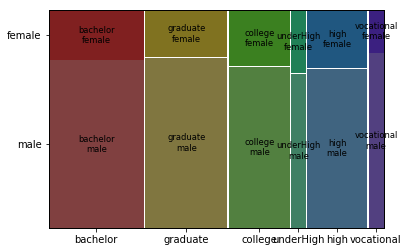

In [39]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Education', 'Gender'])
plt.show()

**Attempt to cluster. First trial with a dataset of just utilitarianism and age**

In [40]:
df_cluster1 = df[['UserID', 'Save_more', 'Age']]
df_cluster1 = df_cluster1.set_index('UserID')

In [41]:
df_cluster1 = df_cluster1.dropna()
df_cluster1.head()

,Save_more,Age
UserID,,
2271406345.00,0.50,41.00
2423489328.00,1.00,31.00
2468356544.00,1.00,20.00
2547770703.00,1.00,21.00
2621136109.00,1.00,18.00


In [42]:
#try with first 100 values

df_trial = df_cluster1.head(100)
df_trial.head()

,Save_more,Age
UserID,,
2271406345.00,0.50,41.00
2423489328.00,1.00,31.00
2468356544.00,1.00,20.00
2547770703.00,1.00,21.00
2621136109.00,1.00,18.00


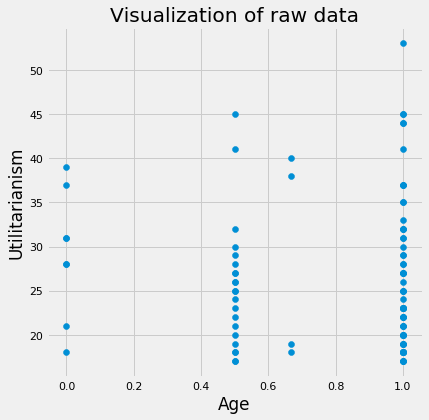

In [43]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df_trial.iloc[:, 0], df_trial.iloc[:, 1])
plt.xlabel('Age')
plt.ylabel('Utilitarianism')
plt.title('Visualization of raw data');

In [73]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


# Standardize the data
X_std = StandardScaler().fit_transform(df_trial1)

In [74]:
# Run local implementation of kmeans
kmeans = KMeans(n_clusters=2).fit(X_std)
print(kmeans.labels_)

[1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0]


IndexError: index 100 is out of bounds for axis 0 with size 100

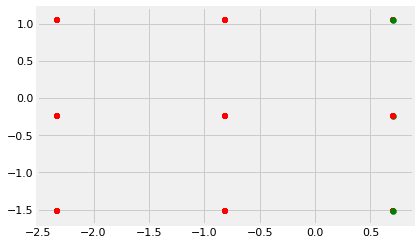

In [65]:
import pylab as pl
for i in range(0, X_std.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(X_std[i,0],X_std[i,1],c='r',
        marker='+')
    elif  kmeans.labels_[i] == 1:
        c2 = pl.scatter(X_std[i,0],X_std[i,1],c='g',
        marker='o')

pl.legend([c1, c2], ['Cluster 0', 'Cluster 1'])
pl.title('Cluster')

**Same with 4 Clusters**

In [47]:
# Run local implementation of kmeans
kmeans = KMeans(n_clusters=4).fit(X_std)
print(kmeans.labels_)

[0 0 2 2 2 1 3 2 3 3 0 2 2 2 0 2 1 0 1 2 0 1 2 2 0 2 1 1 2 2 2 1 1 2 0 1 3
 2 0 2 2 1 0 3 1 2 2 2 0 2 0 0 2 0 2 2 1 1 2 2 1 2 1 2 2 2 2 2 1 2 3 2 0 3
 2 0 2 0 1 1 2 2 2 0 2 3 2 2 1 2 0 2 1 0 0 2 2 1 1 2]


Text(0.5, 1.0, '4 Clusters')

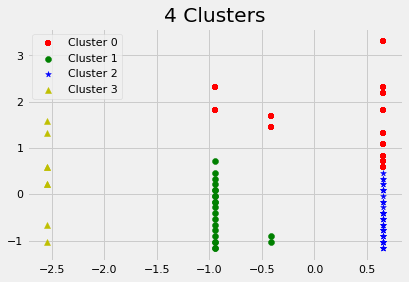

In [48]:
for i in range(0, X_std.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(X_std[i,0],X_std[i,1],c='r',
        marker='+')
    elif  kmeans.labels_[i] == 1:
        c2 = pl.scatter(X_std[i,0],X_std[i,1],c='g',
        marker='o')
    elif  kmeans.labels_[i] == 2:
        c3 = pl.scatter(X_std[i,0],X_std[i,1],c='b',
        marker='*')
    elif  kmeans.labels_[i] == 3:
        c4 = pl.scatter(X_std[i,0],X_std[i,1],c='y',
        marker='^')

pl.legend([c1, c2, c3, c4], ['Cluster 0', 'Cluster 1',
        'Cluster 2', 'Cluster 3'])
pl.title('4 Clusters')

In [56]:
df_cluster2 = df1[['Save_more', 'Age']]
df_cluster2 = df_cluster2.dropna()
df_trial1 = df_cluster2.head(100)
df_trial1.head()


,Save_more,Age
UserID,,
2634986533.00,0.50,18.00
2693609593.00,0.00,31.00
2713973345.00,0.00,18.00
2779335115.00,1.00,35.00
2809254049.00,1.00,20.00


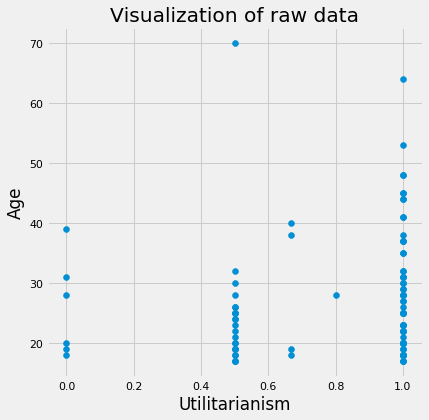

In [58]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df_trial1.iloc[:, 0], df_trial1.iloc[:, 1])
plt.xlabel('Utilitarianism')
plt.ylabel('Age')
plt.title('Visualization of raw data');

In [69]:
X_std_1 = StandardScaler().fit_transform(df_trial1)

In [70]:
# Run local implementation of kmeans
kmeans = KMeans(n_clusters=4).fit(df_trial1)
print(kmeans.labels_)


[0 2 0 1 0 0 2 0 0 1 2 2 0 3 0 2 2 2 0 2 1 0 0 0 0 0 1 2 1 1 0 1 2 2 0 0 0
 0 2 1 0 1 2 0 2 2 1 0 0 0 0 0 1 2 0 2 2 2 2 0 2 1 2 0 2 2 0 1 2 2 2 0 0 1
 0 0 2 0 0 0 0 0 2 2 0 2 3 0 0 0 2 2 0 0 0 2 3 1 1 1]


Text(0, 0.5, 'Age')

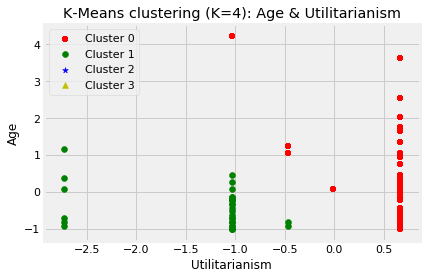

In [78]:
for i in range(0, X_std.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(X_std[i,0],X_std[i,1],c='r',
        marker='+')
    elif  kmeans.labels_[i] == 1:
        c2 = pl.scatter(X_std[i,0],X_std[i,1],c='g',
        marker='o')
    elif  kmeans.labels_[i] == 2:
        c3 = pl.scatter(X_std[i,0],X_std[i,1],c='b',
        marker='*')
    elif  kmeans.labels_[i] == 3:
        c4 = pl.scatter(X_std[i,0],X_std[i,1],c='y',
        marker='^')

pl.legend([c1, c2, c3, c4], ['Cluster 0', 'Cluster 1',
        'Cluster 2', 'Cluster 3'])
pl.title('K-Means clustering (K=4): Age & Utilitarianism')
plt.xlabel('Utilitarianism')
plt.ylabel('Age')

**Save_more and Save_male**

In [54]:
cluster_more_male = df1[['Save_more', 'Save_male']]
cluster_more_male = cluster_more_male.dropna()
trial_cluster_more_male = cluster_more_male.head(100)
trial_cluster_more_male.describe()

,Save_more,Save_male
count,100.00,100.00
mean,0.80,0.46
std,0.30,0.39
min,0.00,0.00
25%,0.50,0.00
50%,1.00,0.50
75%,1.00,1.00
max,1.00,1.00


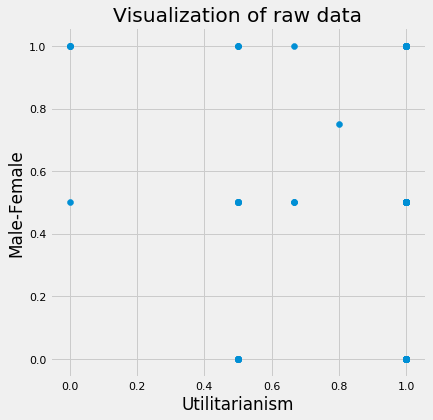

In [55]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(trial_cluster_more_male.iloc[:, 0], trial_cluster_more_male.iloc[:, 1])
plt.xlabel('Utilitarianism')
plt.ylabel('Male-Female')
plt.title('Visualization of raw data');

In [56]:
more_male_scaled = StandardScaler().fit_transform(trial_cluster_more_male)
# Run local implementation of kmeans
kmeans = KMeans(n_clusters=3).fit(more_male_scaled)
print(kmeans.labels_)

[1 0 0 1 2 1 2 2 1 2 1 1 2 1 1 0 0 0 2 1 0 2 1 1 2 2 2 2 2 2 2 2 2 0 2 1 1
 0 0 2 1 2 0 0 2 1 2 1 2 1 0 0 2 2 2 0 1 2 1 1 2 1 2 1 2 1 2 1 2 2 2 2 1 2
 1 0 2 1 1 2 2 1 2 2 1 2 1 1 2 2 0 2 0 0 0 1 1 2 2 2]


Text(0.5, 1.0, 'Utilitarianism & Male-Female')

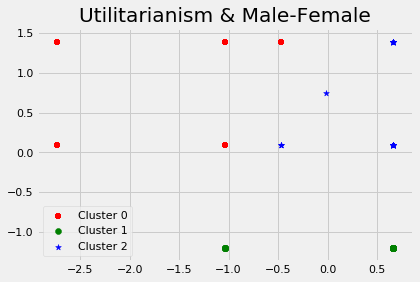

In [57]:
for i in range(0, more_male_scaled.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(more_male_scaled[i,0],more_male_scaled[i,1],c='r',
        marker='+')
    elif  kmeans.labels_[i] == 1:
        c2 = pl.scatter(more_male_scaled[i,0],more_male_scaled[i,1],c='g',
        marker='o')
    elif  kmeans.labels_[i] == 2:
        c3 = pl.scatter(more_male_scaled[i,0],more_male_scaled[i,1],c='b',
        marker='*')

pl.legend([c1, c2, c3], ['Cluster 0', 'Cluster 1',
        'Cluster 2' ])
pl.title('Utilitarianism & Male-Female')